# 학습성과( class) 분류

In [1]:
# 1. 상관계수 : 데이터별 연관성을 추척해야함
#               (누적 막대 활용, 비율로 따짐)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('3일차_6월01일//xAPI-Edu-Data.csv')
df
# 컬럼이 나오지 않으면 Series임

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
# 컬럼별 데이터 갯수
df['gender'].value_counts()

gender
M    305
F    175
Name: count, dtype: int64

In [7]:
df['NationalITy'].value_counts()

NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

In [8]:
# 인덱스 : 다른데이터와 중복되지 않게하는 Key 값
# 차트 그릴때 필요함
tmp = df['gender'].value_counts()
tmp.index

Index(['M', 'F'], dtype='object', name='gender')

<BarContainer object of 2 artists>

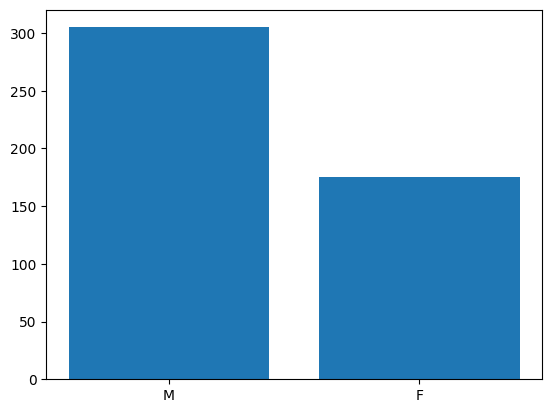

In [9]:
plt.bar(tmp.index,tmp)

<BarContainer object of 3 artists>

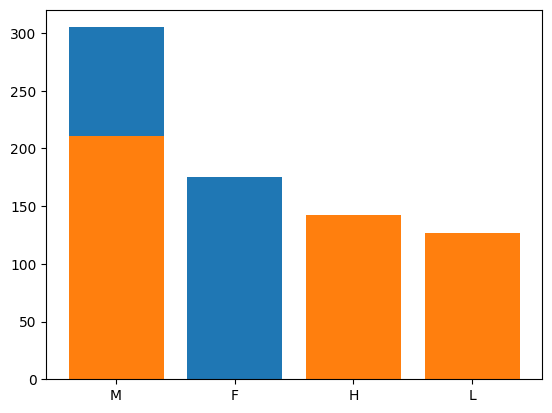

In [10]:
# 합칠 수도 있음
tmp = df['gender'].value_counts()
plt.bar(tmp.index,tmp)
tmp = df['Class'].value_counts()
plt.bar(tmp.index,tmp)

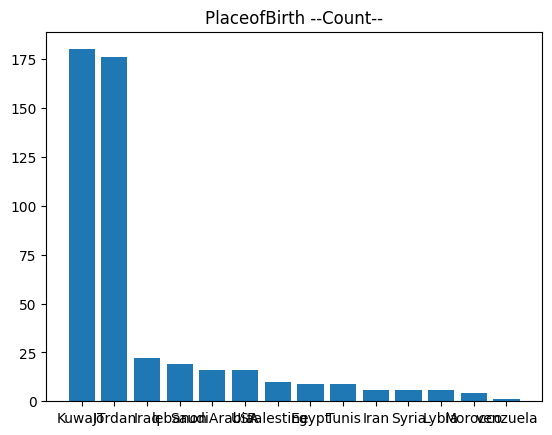

In [11]:
def itemCountChart(field):
    tmp = df[field].value_counts()
    plt.bar(tmp.index,tmp)
    plt.title(field+' --Count--')

itemCountChart('PlaceofBirth')

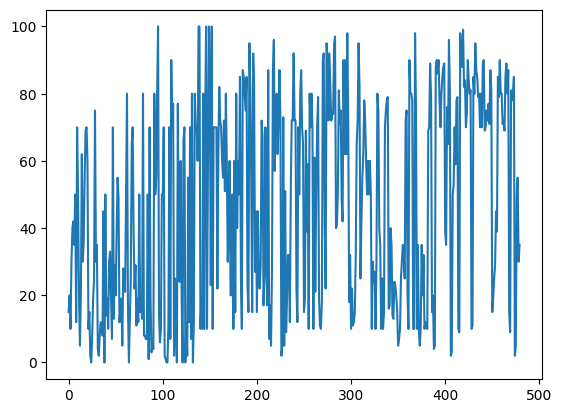

In [12]:
# 꺾은선 그래프
plt.plot(df['raisedhands'])

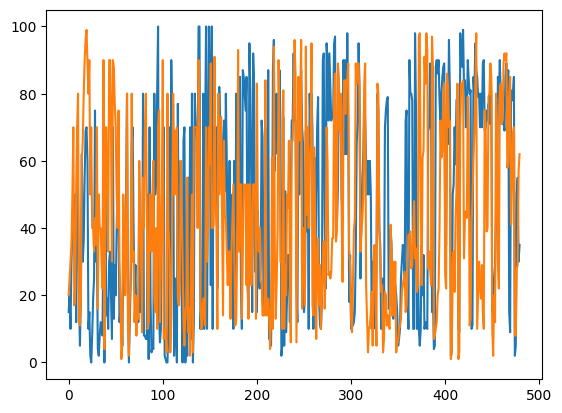

In [13]:
# 중간에 plt.show 하지 않으면 차트에 차트를 더할 수 있음
plt.plot(df['raisedhands'])
plt.plot(df['Discussion'])

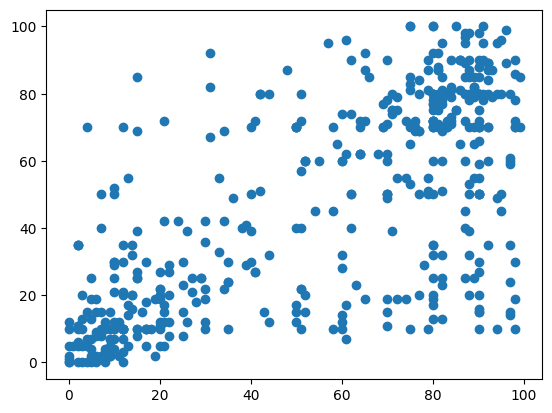

In [14]:
# VisITedResources: 학생이 과목 공지를 확인한 횟수
# 와
# raisedhands: 학생이 수업 중 손을 든 횟수
# 의 연관성?

plt.scatter(df['VisITedResources'],df['raisedhands'])

<Axes: xlabel='raisedhands', ylabel='Count'>

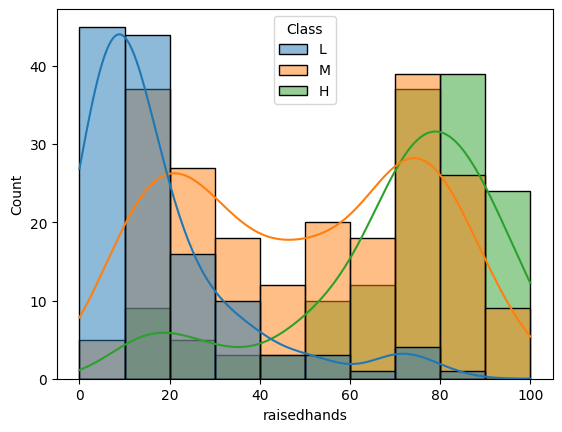

In [15]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
# raisedhands (손든 횟수)에 따른 클래스 비율
# L, M, H 비율이 중요

# 손든 횟수별 클래스 빈도를 보니~
# 손든 횟수가 많을 수록 H 클래스가 많다
# 손든 횟수가 적을 수록 L 클래스가 많다

# hue는 알파벳 순서대로 나오기 때문에
# hue_order로 순서를 지정함 

sns.histplot(x='raisedhands',data=df,hue='Class',hue_order=['L','M','H'],kde=True)

<Axes: xlabel='VisITedResources', ylabel='Count'>

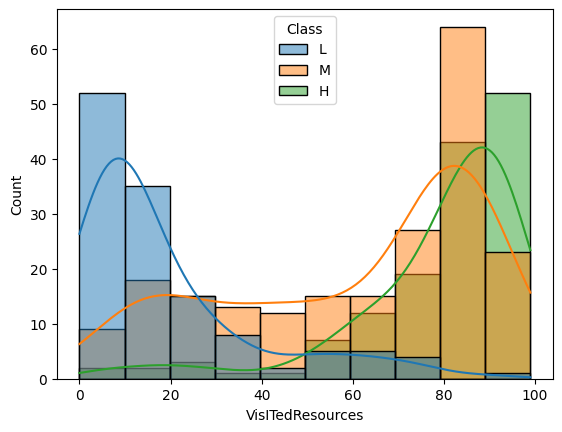

In [16]:
# VisITedResources (과목 공지를 확인한 횟수) 에 따른 클래스 비율
sns.histplot(x='VisITedResources',data=df,hue='Class',hue_order=['L','M','H'],kde=True)

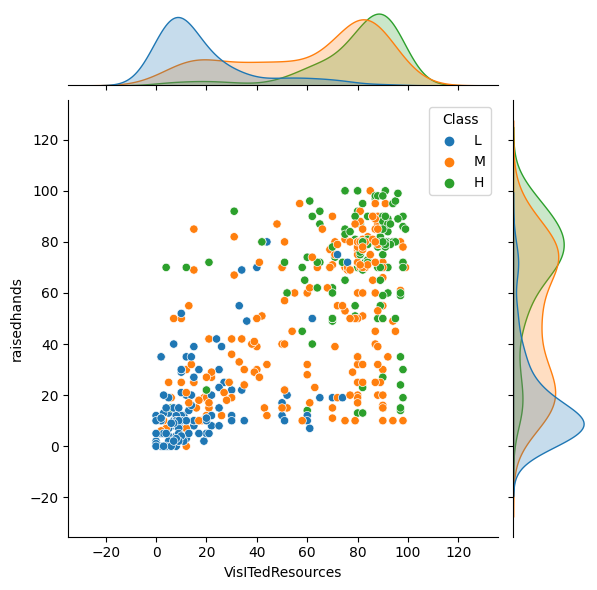

In [27]:
# sns을 이용하지 않는다면
# 'Class'가 L 인 것만 scatter + 'Class'가 M 인 것만 scatter + 'Class'가 H 인 것만 scatter
# 전부 만들어서 합쳐야함

sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'])

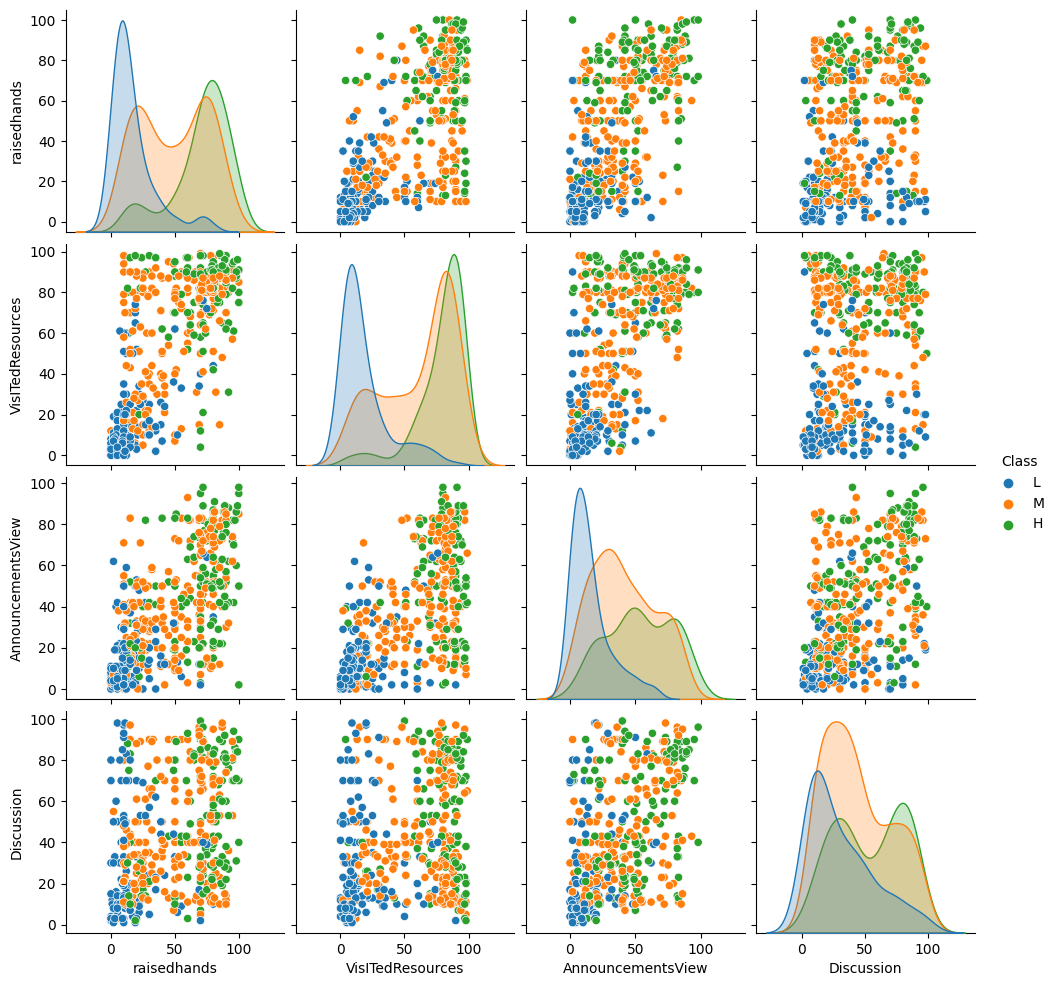

In [28]:
# 데이터 분석 시 가장 먼저 pairplot 확인
# 필드 - 필드별 우상향하는 컬럼을 찾아야함
# 전체 데이터를 볼 때도 있지만
# 파란색, 주황색, 초록색 색깔별로 우상향하는지도 판단해야함 

sns.pairplot(df,hue='Class',hue_order=['L','M','H'])

# 문제 6. Countplot을 이용하여 범주별 통계 확인하기

<Axes: xlabel='Class', ylabel='count'>

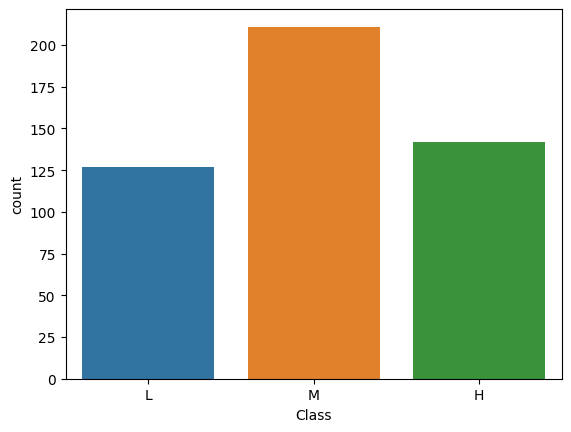

In [29]:
sns.countplot(x='Class',data=df,order=['L','M','H'])

<Axes: xlabel='gender', ylabel='count'>

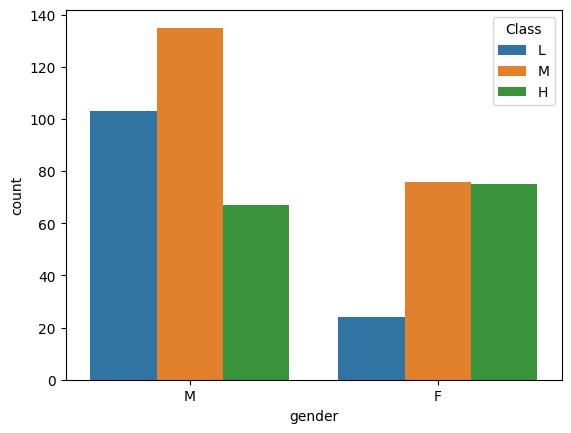

In [30]:
sns.countplot(x='gender',data=df,hue='Class',hue_order=['L','M','H'])
# 갯수로 보면 안되고 비율로 봐야함

In [ ]:
# kb 경영 연구보고서
# 머신 러닝 프로젝트 때 보고서 참고하기